<a href="https://colab.research.google.com/github/Fredase/Loan_Prediction/blob/main/Loan_Default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#import os as os

#print (os.getcwd())


file_path = "/content/classification_data.csv"

# Load your dataset
df = pd.read_csv(file_path)


In [ ]:
# Display basic information and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   label                              1000 non-null   int64
 2   Account type                       1000 non-null   int64
 3   Duration of Credit (month)         1000 non-null   int64
 4   Payment Status of Previous Credit  1000 non-null   int64
 5   Purpose                            1000 non-null   int64
 6   Credit Amount                      1000 non-null   int64
 7   Savings type                       1000 non-null   int64
 8   Length of current employment       1000 non-null   int64
 9   Instalment per cent                1000 non-null   int64
 10  Marital Status                     1000 non-null   int64
 11  Guarantors                         1000 non-null   int64
 12  Duration in Current a

In [ ]:
df.head(10)

user_id  label  Account type  Duration of Credit (month)  \
0   586266      1             1                          18   
1   392565      1             1                           9   
2   204665      1             2                          12   
3   393307      1             1                          12   
4   627375      1             1                          12   
5   705933      1             1                          10   
6   231128      1             1                           8   
7   103992      1             1                           6   
8    67751      1             4                          18   
9   493932      1             2                          24   

   Payment Status of Previous Credit  Purpose  Credit Amount  Savings type  \
0                                  4        2           1049             1   
1                                  4        0           2799             1   
2                                  2        9            841             2   
3                                  4        0           2122             1   
4                                  4        0           2171             1   
5                                  4        0           2241             1   
6                                  4        0           3398             1   
7                                  4        0           1361             1   
8                                  4        3           1098             1   
9                                  2        3           3758             3   

   Length of current employment  Instalment per cent  ...  \
0                             2                    4  ...   
1                             3                    2  ...   
2                             4                    2  ...   
3                             3                    3  ...   
4                             3                    4  ...   
5                             2                    1  ...   
6                             4                    1  ...   
7                             2                    2  ...   
8                             1                    4  ...   
9                             1                    1  ...   

   Duration in Current address  Most valuable available asset  Age  \
0                            4                              2   21   
1                            2                              1   36   
2                            4                              1   23   
3                            2                              1   39   
4                            4                              2   38   
5                            3                              1   48   
6                            4                              1   39   
7                            4                              1   40   
8                            4                              3   65   
9                            4                              4   23   

   Concurrent Credits  Type of apartment  No of Credits at this Bank  \
0                   3                  1                           1   
1                   3                  1                           2   
2                   3                  1                           1   
3                   3                  1                           2   
4                   1                  2                           2   
5                   3                  1                           2   
6                   3                  2                           2   
7                   3                  2                           1   
8                   3                  2                           2   
9                   3                  1                           1   

   Occupation  No of dependents  Telephone  Foreign Worker  
0           3                 1          1               1  
1           3                 2          1               1  
2           2                 1

In [ ]:
df.tail(10)

user_id  label  Account type  Duration of Credit (month)  \
990   638624      0             1                          18   
991    18037      0             2                          24   
992   500888      0             1                          18   
993   157554      0             1                          18   
994   488958      0             1                          12   
995   355104      0             1                          24   
996   407505      0             1                          24   
997   115061      0             4                          21   
998   283292      0             2                          12   
999   232249      0             1                          30   

     Payment Status of Previous Credit  Purpose  Credit Amount  Savings type  \
990                                  2        6            750             1   
991                                  2        1          12579             1   
992                                  2        1           7511             5   
993                                  4        0           3966             1   
994                                  0        3           6199             1   
995                                  2        3           1987             1   
996                                  2        0           2303             1   
997                                  4        0          12680             5   
998                                  2        3           6468             5   
999                                  2        2           6350             5   

     Length of current employment  Instalment per cent  ...  \
990                             1                    4  ...   
991                             5                    4  ...   
992                             5                    1  ...   
993                             5                    1  ...   
994                             3                    4  ...   
995                             3                    2  ...   
996                             5                    4  ...   
997                             5                    4  ...   
998                             1                    2  ...   
999                             5                    4  ...   

     Duration in Current address  Most valuable available asset  Age  \
990                            1                              1   27   
991                            2                              4   44   
992                            4                              2   51   
993                            4                              1   33   
994                            2                              2   28   
995                            4                              1   21   
996                            1                              1   45   
997                            4                              4   30   
998                            1                              4   52   
999                            4                              2   31   

     Concurrent Credits  Type of apartment  No of Credits at this Bank  \
990                   3                  2                           1   
991                   3                  3                           1   
992                   3                  3                           1   
993                   1                  1                           3   
994                   3                  1                           2   
995                   3                  1                           1   
996                   3                  2                           1   
997                   3                  3                           1   
998                   3                  2                           1   
999                   3                  2                           1   

     Occupation  No of dependents  Telephone  Foreign Worker  
990           1                 1          

In [ ]:
# Change columns 'Loan_Default_History' and 'Default_Status' from int to str
df = df.astype({'Account type': str, 'Payment Status of Previous Credit': str,
               'Purpose': str, 'Savings type': str, 'Marital Status': str,
                'Most valuable available asset': str,'Type of apartment': str,
                'Occupation': str, 'Foreign Worker': str, 'Telephone':str})

# Check the data types
#print(df)
print(df.dtypes)

user_id                               int64
label                                 int64
Account type                         object
Duration of Credit (month)            int64
Payment Status of Previous Credit    object
Purpose                              object
Credit Amount                         int64
Savings type                         object
Length of current employment          int64
Instalment per cent                   int64
Marital Status                       object
Guarantors                            int64
Duration in Current address           int64
Most valuable available asset        object
Age                                   int64
Concurrent Credits                    int64
Type of apartment                    object
No of Credits at this Bank            int64
Occupation                           object
No of dependents                      int64
Telephone                            object
Foreign Worker                       object
dtype: object


In [ ]:
#import pandas as pd
from scipy.stats import pointbiserialr


# Define the binary target variable
target_column = "label"

df.drop(columns=["user_id"], inplace=True)

# Select only numerical columns (excluding the target itself)
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
numerical_features.remove(target_column)  # Remove target column from features

# Compute Point-Biserial Correlation for each numerical feature
correlation_results = {}

for feature in numerical_features:
    corr, p_value = pointbiserialr(df[target_column], df[feature])
    correlation_results[feature] = {"Correlation": corr, "P-Value": p_value}

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results).T

# Display correlation values
print(correlation_df)


                              Correlation       P-Value
Duration of Credit (month)      -0.214927  6.488050e-12
Credit Amount                   -0.154740  8.795399e-07
Length of current employment     0.116002  2.367939e-04
Instalment per cent             -0.072404  2.203549e-02
Guarantors                       0.025137  4.271805e-01
Duration in Current address     -0.002967  9.253374e-01
Age                              0.091272  3.868455e-03
Concurrent Credits               0.109844  5.018529e-04
No of Credits at this Bank       0.045732  1.484198e-01
No of dependents                 0.003015  9.241409e-01


<ipython-input-7-7721c699dd22>:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


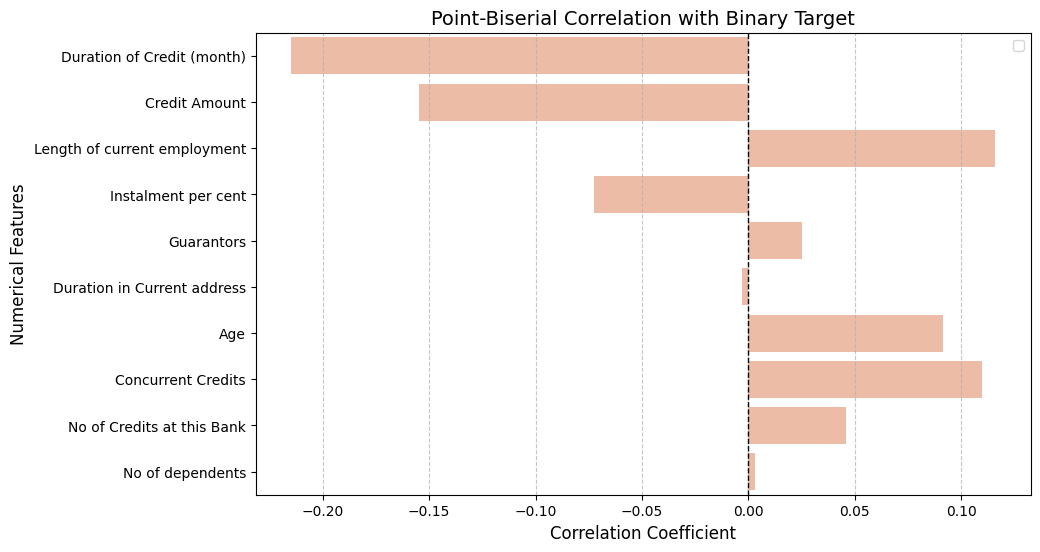

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the binary target variable
target_column = "label"

# Select numerical features (excluding the target itself)
numerical_features = df.select_dtypes(include=["number"]).columns.tolist()
numerical_features.remove(target_column)  # Remove target column from features

# Compute Point-Biserial Correlation for each numerical feature
correlation_results = {}

for feature in numerical_features:
    corr, p_value = pointbiserialr(df[target_column], df[feature])
    correlation_results[feature] = corr  # Store only the correlation coefficient

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results.items(), columns=["Feature", "Correlation"])

# Sort by correlation value for better visualization
correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

#  Visualization: Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Correlation", y="Feature", data=correlation_df, palette="coolwarm",
            hue=df[target_column], legend=False)
plt.title("Point-Biserial Correlation with Binary Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Numerical Features")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.legend()

# Formatting the plot
plt.axvline(0, color="black", linestyle="dashed", linewidth=1)  # Zero correlation reference line
plt.title("Point-Biserial Correlation with Binary Target", fontsize=14)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Numerical Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [ ]:
# Summary statistics for numerical features
print(df.describe())

             label  Duration of Credit (month)  Credit Amount  \
count  1000.000000                 1000.000000     1000.00000   
mean      0.700000                   20.903000     3271.24800   
std       0.458487                   12.058814     2822.75176   
min       0.000000                    4.000000      250.00000   
25%       0.000000                   12.000000     1365.50000   
50%       1.000000                   18.000000     2319.50000   
75%       1.000000                   24.000000     3972.25000   
max       1.000000                   72.000000    18424.00000   

       Length of current employment  Instalment per cent   Guarantors  \
count                   1000.000000          1000.000000  1000.000000   
mean                       3.384000             2.973000     1.145000   
std                        1.208306             1.118715     0.477706   
min                        1.000000             1.000000     1.000000   
25%                        3.000000             2

In [ ]:
df = df.astype({'label':str})

In [ ]:
# Summary statistics for categorical features
categorical_columns = ['Account type', 'Payment Status of Previous Credit',
                       'Purpose', 'Savings type', 'Marital Status',
                       'Most valuable available asset','Type of apartment',
                       'Occupation', 'Foreign Worker','Telephone','label']


for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Value counts for Account type:
Account type
4    394
1    274
2    269
3     63
Name: count, dtype: int64
Value counts for Payment Status of Previous Credit:
Payment Status of Previous Credit
2    530
4    293
3     88
1     49
0     40
Name: count, dtype: int64
Value counts for Purpose:
Purpose
3     280
0     234
2     181
1     103
9      97
6      50
5      22
10     12
4      12
8       9
Name: count, dtype: int64
Value counts for Savings type:
Savings type
1    603
5    183
2    103
3     63
4     48
Name: count, dtype: int64
Value counts for Marital Status:
Marital Status
3    548
2    310
4     92
1     50
Name: count, dtype: int64
Value counts for Most valuable available asset:
Most valuable available asset
3    332
1    282
2    232
4    154
Name: count, dtype: int64
Value counts for Type of apartment:
Type of apartment
2    714
1    179
3    107
Name: count, dtype: int64
Value counts for Occupation:
Occupation
3    630
2    200
4    148
1     22
Name: count, dtype: int64
Val

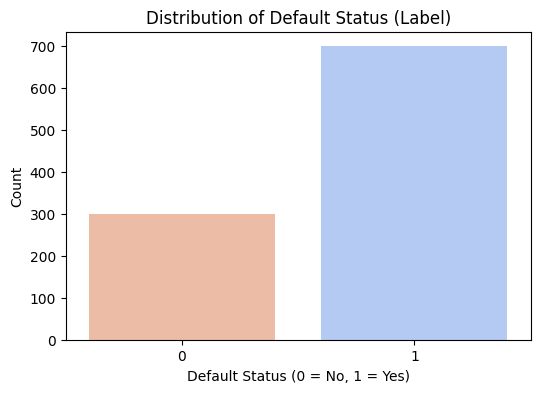

Duration of Credit (month)  Credit Amount  \
count                 1000.000000     1000.00000   
mean                    20.903000     3271.24800   
std                     12.058814     2822.75176   
min                      4.000000      250.00000   
25%                     12.000000     1365.50000   
50%                     18.000000     2319.50000   
75%                     24.000000     3972.25000   
max                     72.000000    18424.00000   

       Length of current employment  Instalment per cent   Guarantors  \
count                   1000.000000          1000.000000  1000.000000   
mean                       3.384000             2.973000     1.145000   
std                        1.208306             1.118715     0.477706   
min                        1.000000             1.000000     1.000000   
25%                        3.000000             2.000000     1.000000   
50%                        3.000000             3.000000     1.000000   
75%                        5.000000             4.000000     1.000000   
max                        5.000000             4.000000     3.000000   

       Duration in Current address         Age  Concurrent Credits  \
count                  1000.000000  1000.00000         1000.000000   
mean                      2.845000    35.54200            2.675000   
std                       1.103718    11.35267            0.705601   
min                       1.000000    19.00000            1.000000   
25%                       2.000000    27.00000            3.000000   
50%                       3.000000    33.00000            3.000000   
75%                       4.000000    42.00000            3.000000   
max                       4.000000    75.00000            3.000000   

       No of Credits at this Bank  No of dependents  
count                 1000.000000       1000.000000  
mean                     1.407000          1.155000  
std                      0.577654          0.362086  
min                      1.000000          1.000000  
25%                      1.000000          1.000000  
50%                      1.000000          1.000000  
75%                      2.000000          1.000000  
max                      4.000000          2.000000

In [ ]:
# Summary statistics
summary_stats = df.describe()

# Visualizing the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["label"], palette="coolwarm", hue=df["label"],
              order=["0", "1"], legend=False)
plt.title("Distribution of Default Status (Label)")
plt.xlabel("Default Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Display summary statistics
summary_stats


In [ ]:
# Assign columns with int or float data types to 'numerical_variables'
numerical_variables = df.select_dtypes(include=['int', 'float'])

# Display the result
print(numerical_variables.dtypes)

Duration of Credit (month)      int64
Credit Amount                   int64
Length of current employment    int64
Instalment per cent             int64
Guarantors                      int64
Duration in Current address     int64
Age                             int64
Concurrent Credits              int64
No of Credits at this Bank      int64
No of dependents                int64
dtype: object


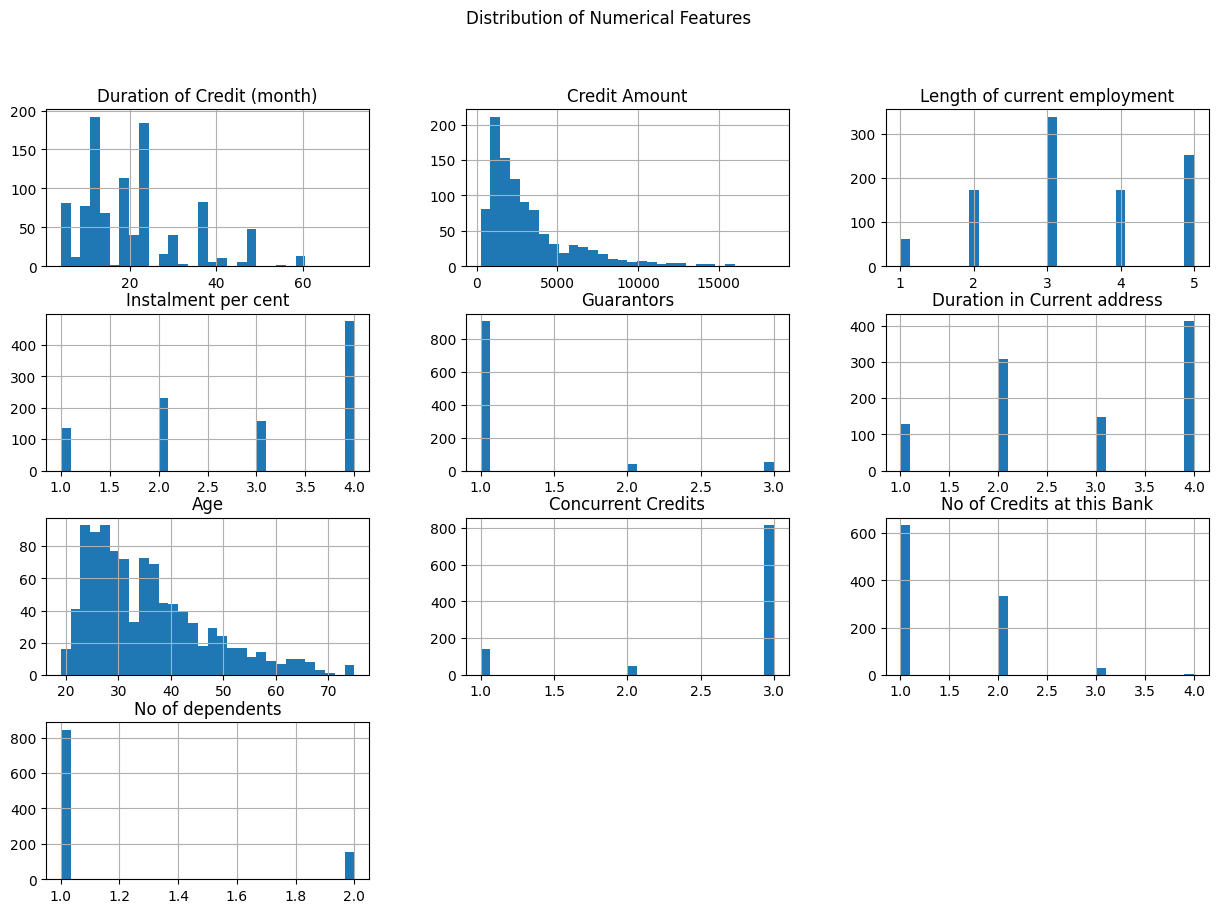

In [ ]:

# Histograms for numerical features
numerical_variables.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

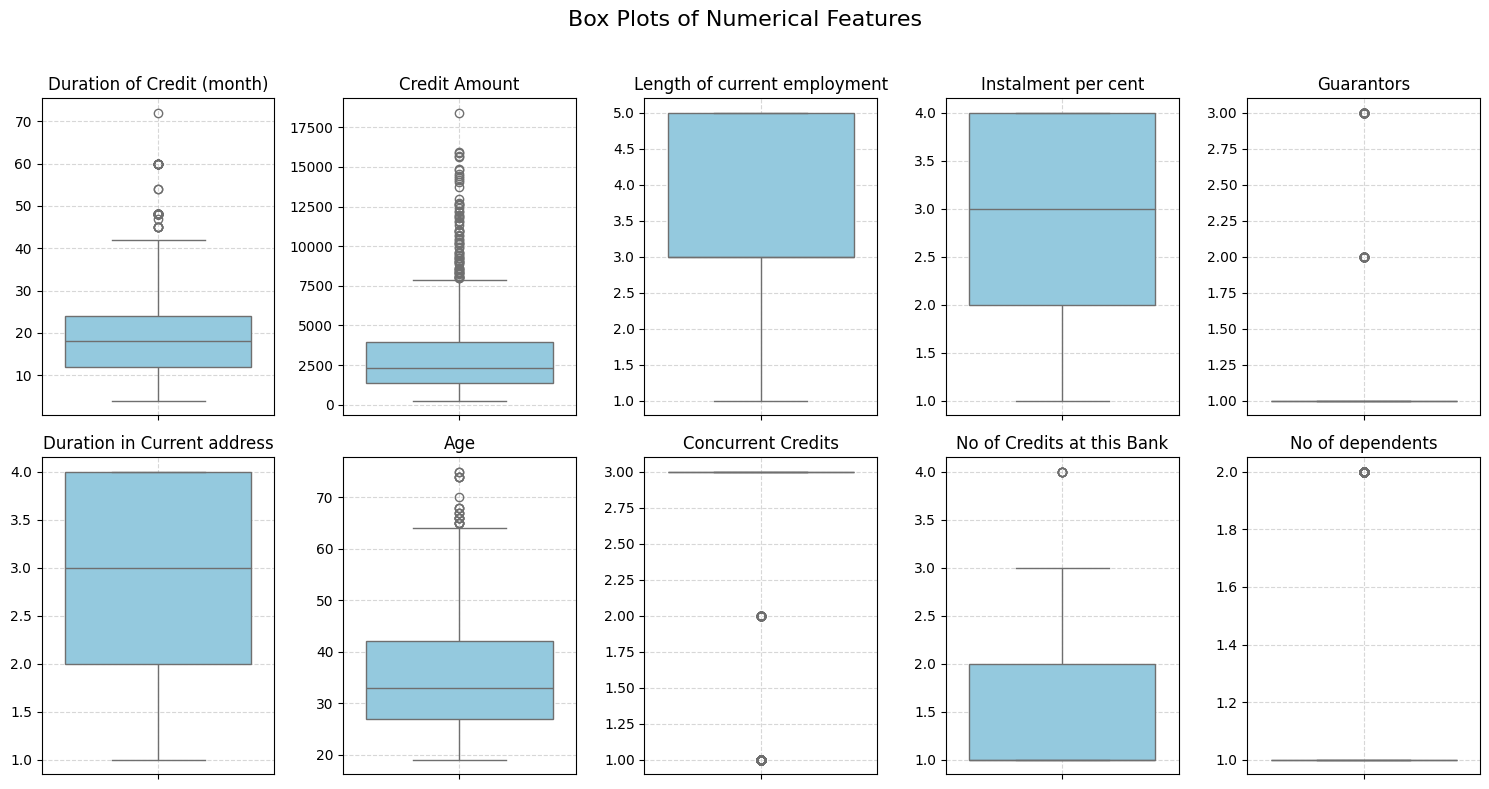

In [ ]:
# Plot boxplots for numerical features
# Set up subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))  # 2 rows, 5 columns for better visualization

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and create a boxplot
for i, col in enumerate(numerical_variables):
  # Box plots for numerical features
    sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12)
    axes[i].set_ylabel("")  # Remove y-axis label for cleaner look
    axes[i].grid(True, linestyle="--", alpha=0.5)  # Add grid for readability


plt.suptitle('Box Plots of Numerical Features', fontsize=16)
# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure suptitle doesn't overlap
plt.show()

<ipython-input-15-2ba0211915bc>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
<ipython-input-15-2ba0211915bc>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
<ipython-input-15-2ba0211915bc>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
<ipython-input-15-2ba0211915bc>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axe

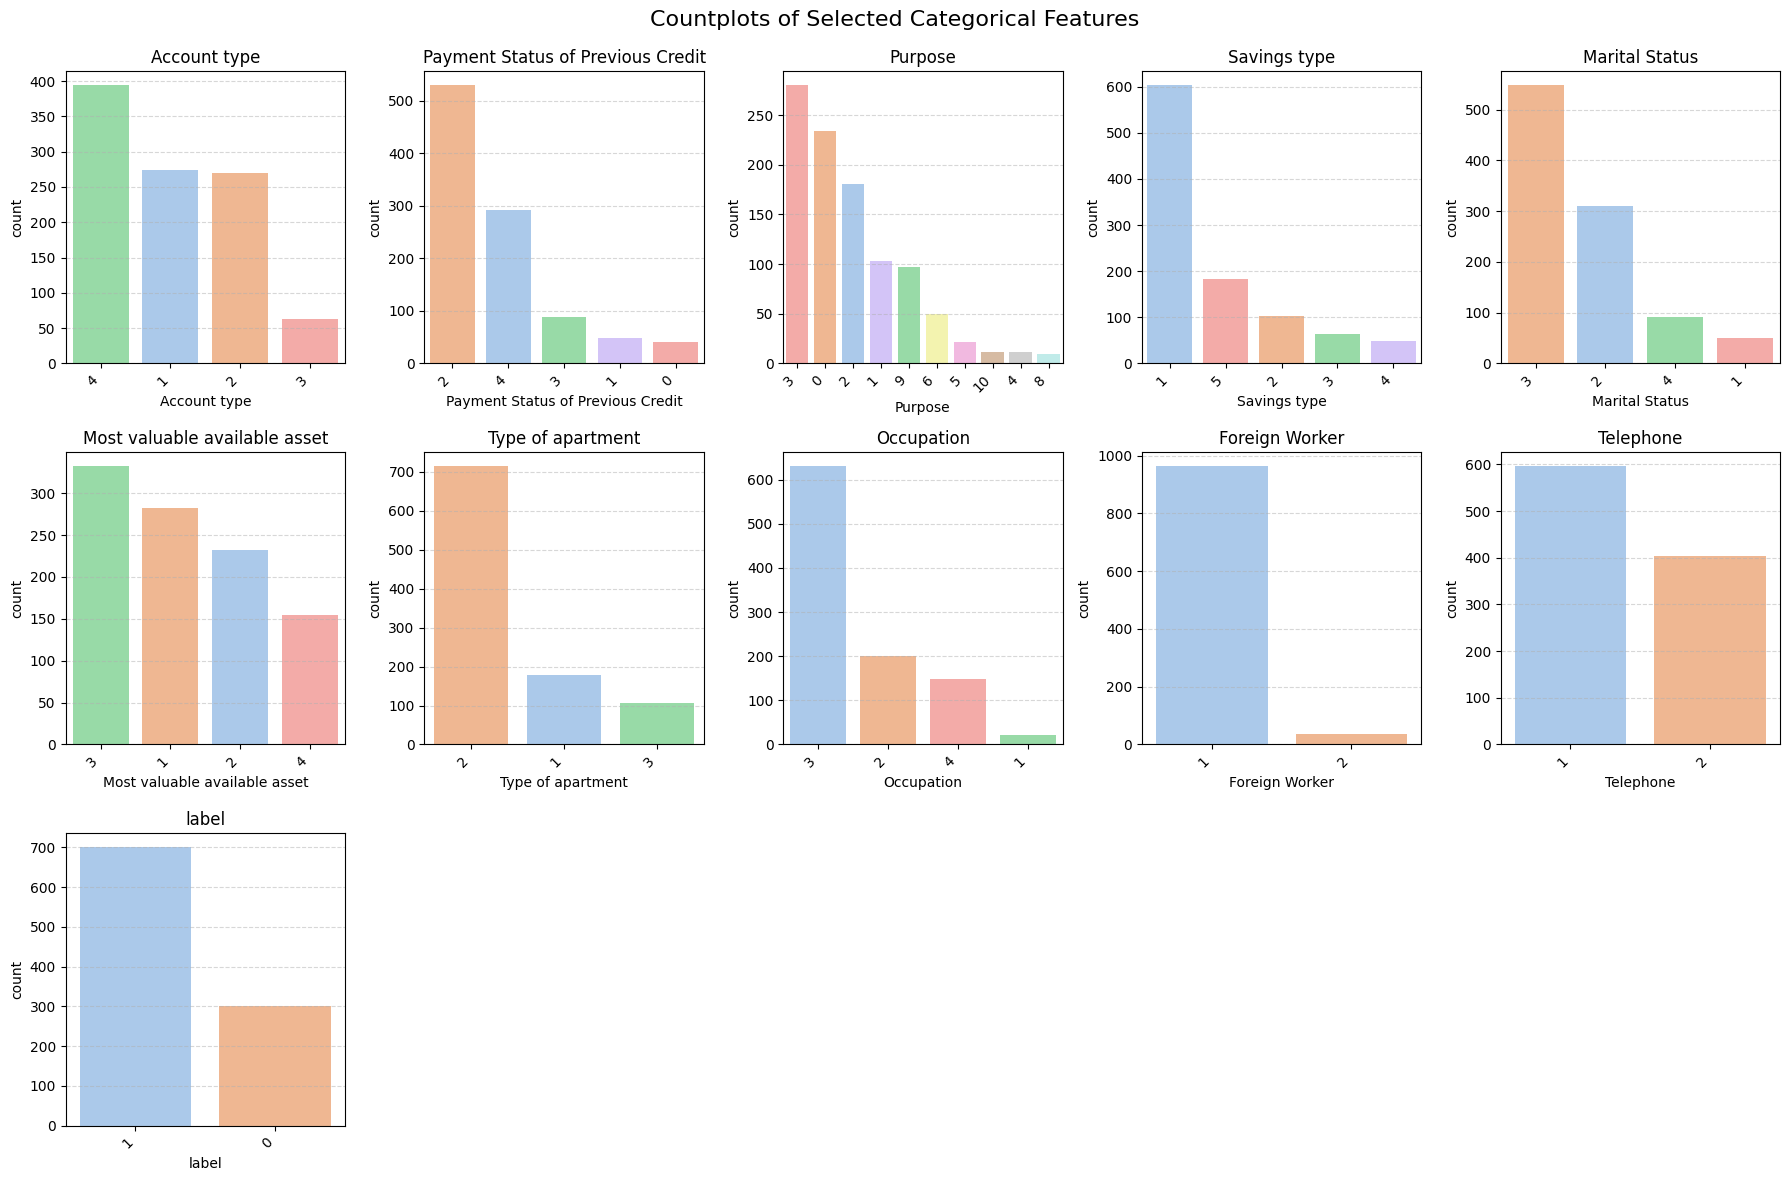

In [ ]:
## Countplots for categorical features
# Ensure only existing columns are used (prevents index errors)
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Determine number of plots
num_plots = len(categorical_columns)
rows = (num_plots // 5) + (num_plots % 5 > 0)  # Calculate rows needed dynamically


# Set up subplot grid
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(18, 4 * rows))
# Flatten the axes array for easy iteration
axes = axes.flatten() if num_plots > 1 else [axes]

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], palette="pastel", hue=df[col], order=df[col].value_counts().index)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")  # Rotate x labels for readability
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)  # Add grid for better visualization

# Hide any unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ensure suptitle doesn't overlap
fig.suptitle("Countplots of Selected Categorical Features", fontsize=16)
plt.show()

2 **Data Preprocessing**

2.1 **Handling Missing Values**
Check for missing values and decide how to handle them (impute or drop).

In [ ]:
df.isnull().sum()

label                                0
Account type                         0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Savings type                         0
Length of current employment         0
Instalment per cent                  0
Marital Status                       0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [ ]:
# Impute missing values (e.g., with median for numerical features and mode for categorical features)
#for col in numerical_columns:
#    df[col].fillna(df[col].median(), inplace=True)

#for col in categorical_columns:
#    df[col].fillna(df[col].mode()[0], inplace=True)

2.2 **Encoding Categorical Variables**

Convert categorical variables into numerical format using StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Encode categorical features in X

categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = X.copy()
X_encoded[categorical_columns] = X_encoded[categorical_columns].apply(LabelEncoder().fit_transform)

2.3** Scaling Numerical Features**

Scale numerical features to ensure they are on a similar scale.

In [ ]:
# Scale numerical features
numerical_columns = X_encoded.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_encoded[numerical_columns] = scaler.fit_transform(X_encoded[numerical_columns])

# Option 2: Min-Max Scaling (Normalization)
#scaler_minmax = MinMaxScaler()
#df_normalized = df.copy()
#df_normalized[numerical_variables_1] = scaler_minmax.fit_transform(df[numerical_variables_1])

**Split dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

3. **Model Training and Evaluation**

3.1 **Logistic Regression**

Train and evaluate a Logistic Regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        62
           1       0.78      0.89      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.74      0.75      0.73       200

ROC-AUC Score: 0.7910238429172511


3.2 **Decision Tree**

Train and evaluate a Decision Tree model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)  # Adjust hyperparameters if needed
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55        62
           1       0.80      0.78      0.79       138

    accuracy                           0.71       200
   macro avg       0.66      0.67      0.67       200
weighted avg       0.72      0.71      0.71       200


Confusion Matrix:
 [[ 35  27]
 [ 31 107]]
ROC-AUC Score: 0.7076905095839179


Visualize the Decison Tree either using **Matplotlib** or **GraphViz**

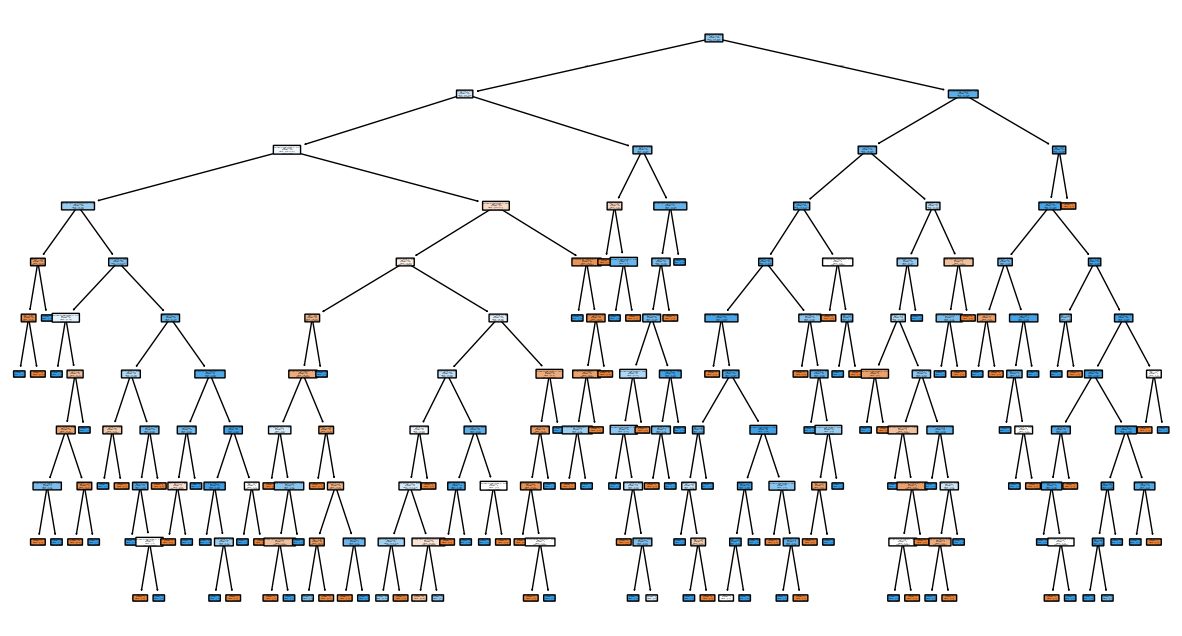

In [ ]:
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(15, 8))

# Plot the decision tree
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Non-Default', 'Default'], rounded=True)

# Show the plot
plt.show()

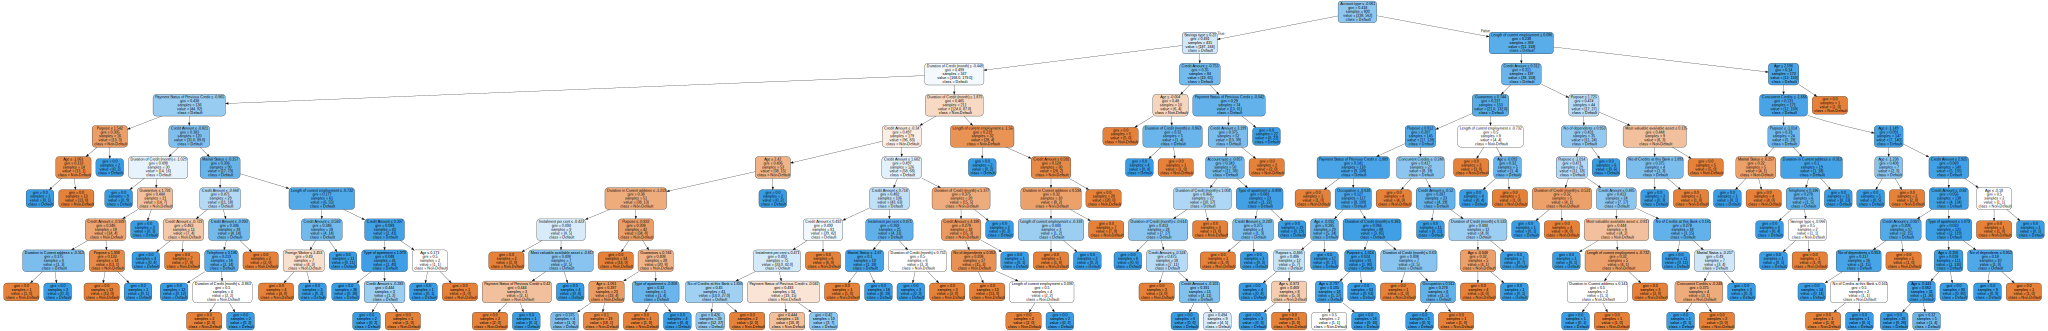

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

# Export the decision tree to DOT format
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['Non-Default', 'Default'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Convert to Graphviz object and display
graph = graphviz.Source(dot_data)
display(graph)  # Display in Jupyter Notebook

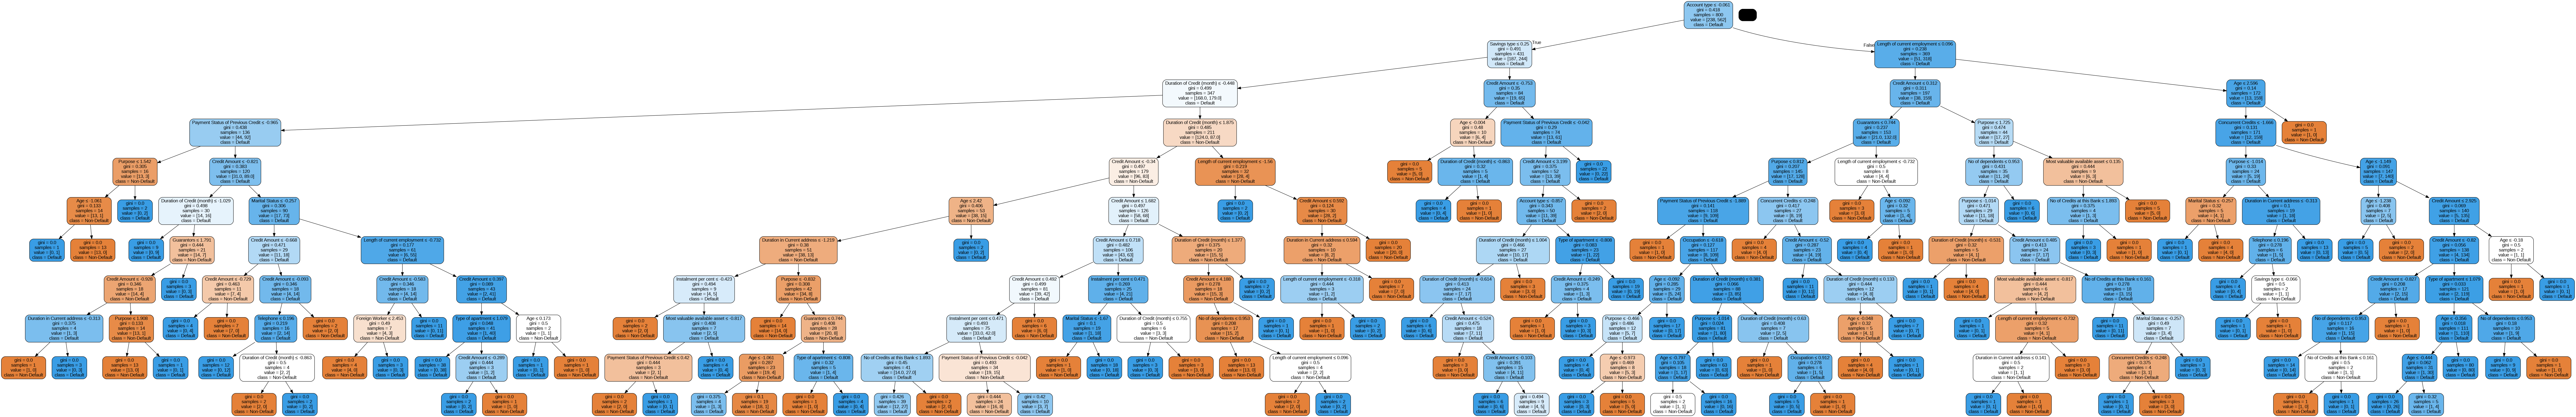

In [ ]:
import pydotplus
from IPython.display import Image


# Convert to a Graph object
graph = pydotplus.graph_from_dot_data(dot_data)

# Save the graph as a PNG file
graph.write_png("decision_tree.png")

# Display the image
Image(filename="decision_tree.png")

3.3 **Random Forest**

Train and evaluate a Random Forest model.

Random Forest Accuracy: 0.7500
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.42      0.51        62
           1       0.78      0.90      0.83       138

    accuracy                           0.75       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.74      0.75      0.73       200

ROC-AUC Score: 0.7645511921458625


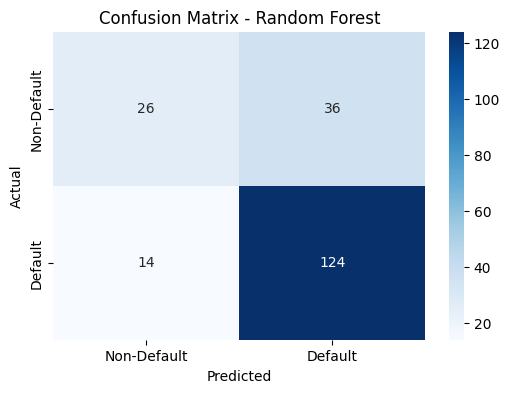

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

3.4 **Neural Network**

Train and evaluate a Neural Network model.

Neural Network Accuracy: 0.7600

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.63      0.62        62
           1       0.83      0.82      0.82       138

    accuracy                           0.76       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.76      0.76       200



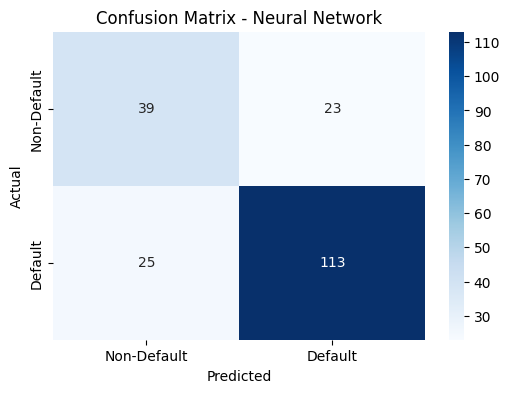

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {accuracy:.4f}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Neural Network")
plt.show()

Training using a **Keras** model

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4949 - loss: 0.7211 - val_accuracy: 0.6900 - val_loss: 0.5951
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6723 - loss: 0.6021 - val_accuracy: 0.7100 - val_loss: 0.5522
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7350 - loss: 0.5251 - val_accuracy: 0.7450 - val_loss: 0.5278
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 0.5548 - val_accuracy: 0.7450 - val_loss: 0.5130
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - loss: 0.5487 - val_accuracy: 0.7500 - val_loss: 0.5020
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7580 - loss: 0.4912 - val_accuracy: 0.7400 - val_loss: 0.4955
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7599 - loss: 0.4928 - val_accuracy: 0.7550 - val_loss: 0.4916
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7763 - loss: 0.4666 - val_accuracy: 0.7650 - val_loss: 0.4906
Ep

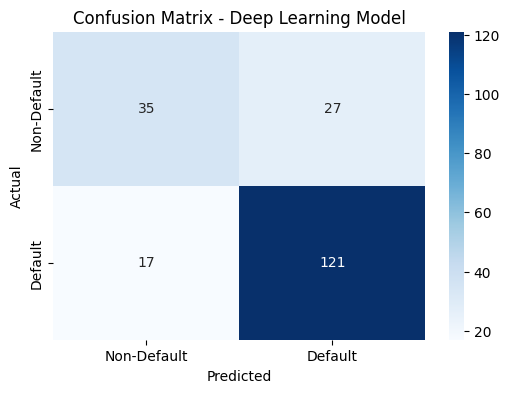

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


# Define the Neural Network Model
nn_model_kr = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model_kr.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model_kr.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict probabilities and convert to binary labels
y_pred_prob_kr = nn_model_kr.predict(X_test)
y_pred_kr = (y_pred_prob_kr > 0.5).astype(int)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_kr)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_kr))

print("ROC-AUC Score:", roc_auc_score(y_test, nn_model_kr.predict(X_test)))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_kr)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

**Hyperparameter tuning**
I'll attempt tuning of hyperparameters tuning for all 4-5 models

**Logistics Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize model
log_reg = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Logistic Regression Parameters:", grid_search.best_params_)
print("Best Logistic Regression Accuracy:", grid_search.best_score_)

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Accuracy: 0.76625


**Decision Tree**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_search.best_params_)
print("Best Decision Tree Accuracy:", grid_search.best_score_)

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Decision Tree Accuracy: 0.72


**Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_search.best_params_)
print("Best Random Forest Accuracy:", grid_search.best_score_)

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.78


**Neural Network**

In [ ]:
!pip install keras-tuner

import keras_tuner as kt

# Function to build model with tunable parameters
def build_nn(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize tuner
tuner = kt.Hyperband(
    build_nn,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_tuning',
    project_name='loan_default_nn'
)

# Run tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Best parameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Neural Network Parameters:", best_hps.values)
nn_model_kr.save("best_nn_model.h5")

Trial 23 Complete [00h 00m 03s]
val_accuracy: 0.7599999904632568

Best val_accuracy So Far: 0.7900000214576721
Total elapsed time: 00h 01m 23s
Best Neural Network Parameters: {'units': 128, 'learning_rate': 0.01, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}


**Retrain the models using the best hyperparameters for each model**


Logistic Regression Model Evaluation:
Accuracy: 0.7500
Precision: 0.7785
Recall: 0.8913
F1-Score: 0.8311
ROC AUC Score: 0.7915


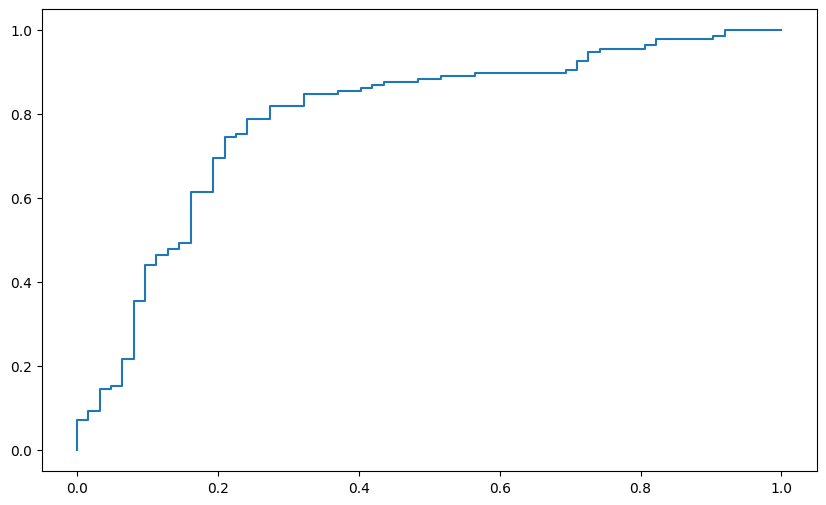

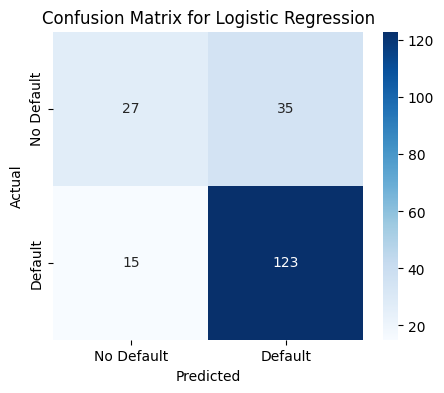


Decision Tree Model Evaluation:
Accuracy: 0.6950
Precision: 0.7584
Recall: 0.8188
F1-Score: 0.7875
ROC AUC Score: 0.7349


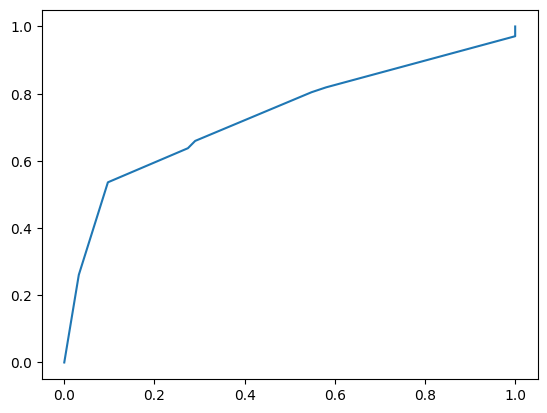

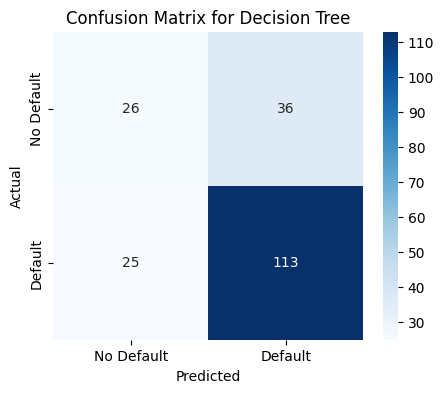


Random Forest Model Evaluation:
Accuracy: 0.7550
Precision: 0.7697
Recall: 0.9203
F1-Score: 0.8383
ROC AUC Score: 0.7841


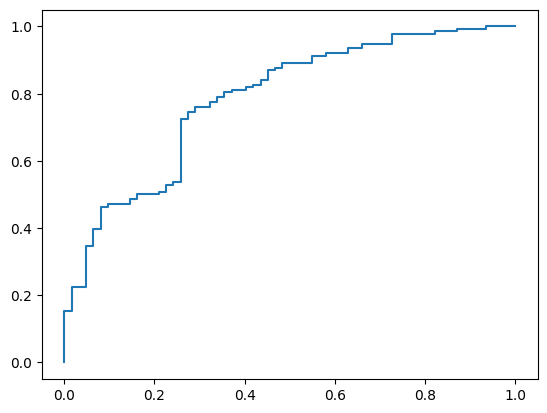

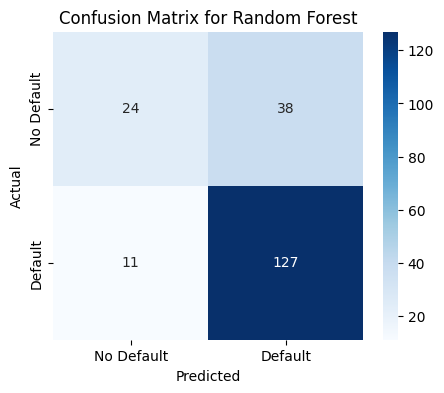

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Neural Network Model Evaluation:
Accuracy: 0.7800
Precision: 0.8176
Recall: 0.8768
F1-Score: 0.8462
ROC AUC Score: 0.7949


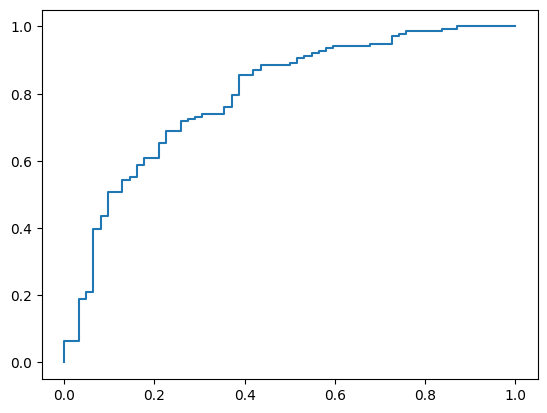

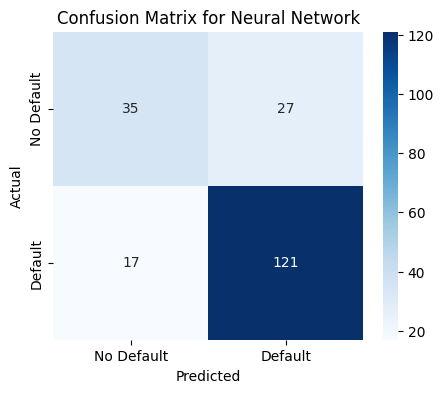

<ipython-input-33-41a5be4f62e3>:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


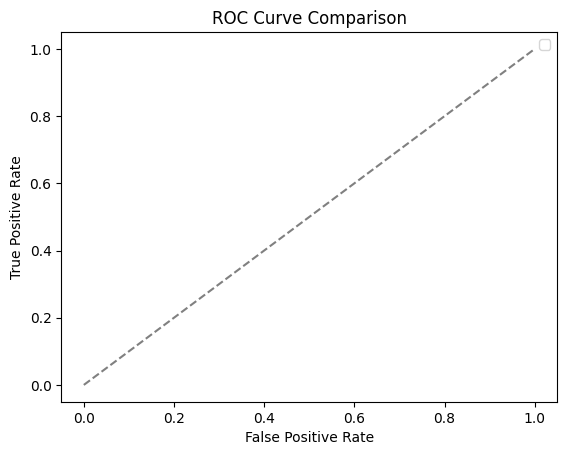

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Best hyperparameters from tuning (Replace with your actual best values)
best_params = {
    "logistic_regression": {"C": 1.0, 'penalty': 'l2', "solver": "liblinear"},
    "decision_tree": {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2},
    "random_forest": {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200},
    "neural_network":{'units': 128, 'learning_rate': 0.01, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 3, 'tuner/round': 0}
}

# Train models with best hyperparameters
logreg = LogisticRegression(**best_params["logistic_regression"])
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(**best_params["decision_tree"])
dtree.fit(X_train, y_train)

rf = RandomForestClassifier(**best_params["random_forest"])
rf.fit(X_train, y_train)

# Load the trained Neural Network model
nn_model_kr = load_model("best_nn_model.h5")

# Store models
models = {"Logistic Regression": logreg, "Decision Tree": dtree, "Random Forest": rf, "Neural Network": nn_model_kr}

# Initialize evaluation dictionary
evaluation_results = {}

# Plot ROC curves
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if name == "Neural Network":
        y_probs = model.predict(X_test).flatten()  # Get probability scores
    else:
        y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1

    # Get predicted labels
    y_pred = (y_probs > 0.5).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_probs)

    # Store results
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

    # Print evaluation results
    print(f"\n{name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Default", "Default"],
                yticklabels=["No Default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# Final ROC curve plot
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


**Model Interpretation**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c8ebb199eaad04f84dff232b83d1b0f6680490d2c5c9195d4e07c81c4c0142ed
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


<ipython-input-35-cb5df2fb63bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")


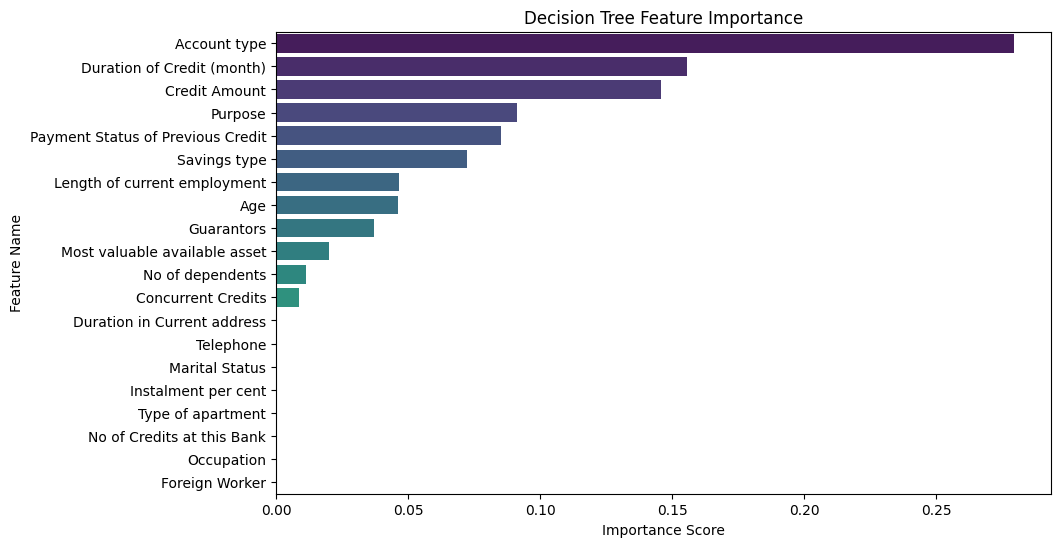

<ipython-input-35-cb5df2fb63bf>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")


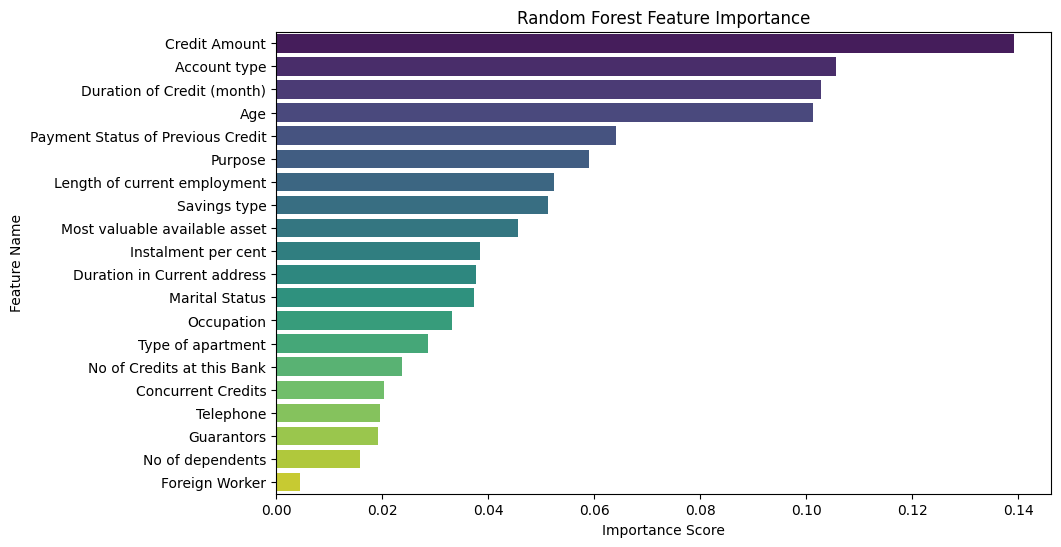

  0%|          | 0/10 [00:00<?, ?it/s]

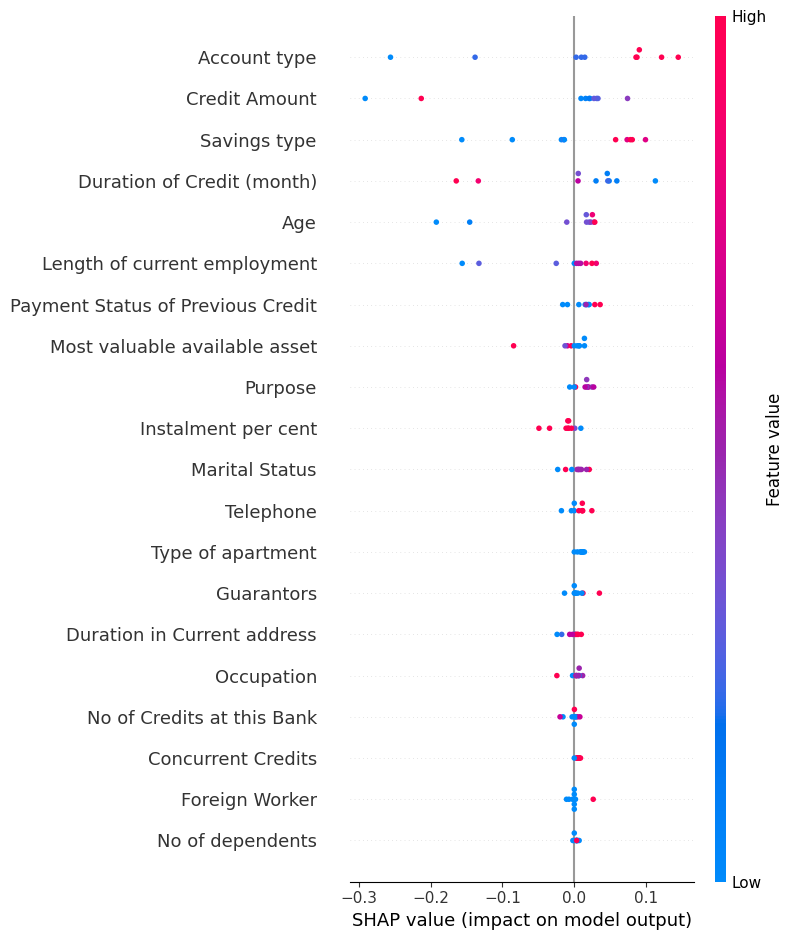

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install lime

import shap
import lime
import lime.lime_tabular

# Train Decision Tree & Random Forest
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# 🚀 1️⃣ Feature Importance (for Decision Tree & Random Forest)
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="viridis")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.title(title)
    plt.show()

# 🎯 Plot Feature Importance
plot_feature_importance(dt_model, X_train.columns, "Decision Tree Feature Importance")
plot_feature_importance(rf_model, X_train.columns, "Random Forest Feature Importance")

# 🚀 2️⃣ SHAP (Explaining Overall Model Predictions)
#explainer_shap = shap.Explainer(rf_model, X_train)
#shap_values = explainer_shap(X_test, check_additivity=False)
explainer_shap = shap.KernelExplainer(rf_model.predict, X_train[:100])  # Use a subset for performance
shap_values = explainer_shap.shap_values(X_test[:10])

# 🎯 SHAP Summary Plot (Global Interpretability)
shap.summary_plot(shap_values, X_test[:10])

# 🎯 SHAP Force Plot (Explaining a Single Prediction)
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[0], X_test.iloc[0])

#  3 LIME (Explaining Individual Predictions)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["No Default", "Default"],
    mode="classification"
)

# Pick a random test instance
i = np.random.randint(0, len(X_test))
lime_exp = explainer_lime.explain_instance(
    X_test.iloc[i].values, rf_model.predict_proba, num_features=5
)

# 🎯 LIME Explanation Visualization
lime_exp.show_in_notebook()


In [ ]:
#import lime
#import lime.lime_tabular

# Assuming 'model' is the trained model and 'X_train' is the training dataset
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                                                   class_names=['Default', 'No Default'],
                                                   discretize_continuous=True, mode="classification")

# Explain an instance
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.iloc[i].values, rf_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True, show_all=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


4.** Comparison of Model Performance**

4.1 **Metrics Comparison**

Compare the models based on **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **AUC-ROC**.

4.2 **Findings and Insights**

**Best Performing Model**: Identify the model with the highest AUC-ROC and F1-Score.

**Key Predictors**: Use feature importance from Random Forest or SHAP values to identify the most important features.

**Business Implications**: Discuss how the model can be used to reduce credit default risk in Nigeria.

In [ ]:
# Function to calculate metrics
def evaluate_model(y_true, y_pred, y_pred_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }

# Evaluate all models
models = {
    'Logistic Regression': (y_pred_lr, lr_model.predict_proba(X_test)[:, 1]),
    'Decision Tree': (y_pred_dt, dt_model.predict_proba(X_test)[:, 1]),
    'Random Forest': (y_pred_rf, rf_model.predict_proba(X_test)[:, 1]),
    'Neural Network': (y_pred_nn, nn_model.predict(X_test))
}

results = {}
for name, (y_pred, y_pred_proba) in models.items():
    results[name] = evaluate_model(y_test, y_pred, y_pred_proba)

# Display results
results_df = pd.DataFrame(results).T
print(results_df)